In [3]:
import numpy as np
import matplotlib.pyplot as plt

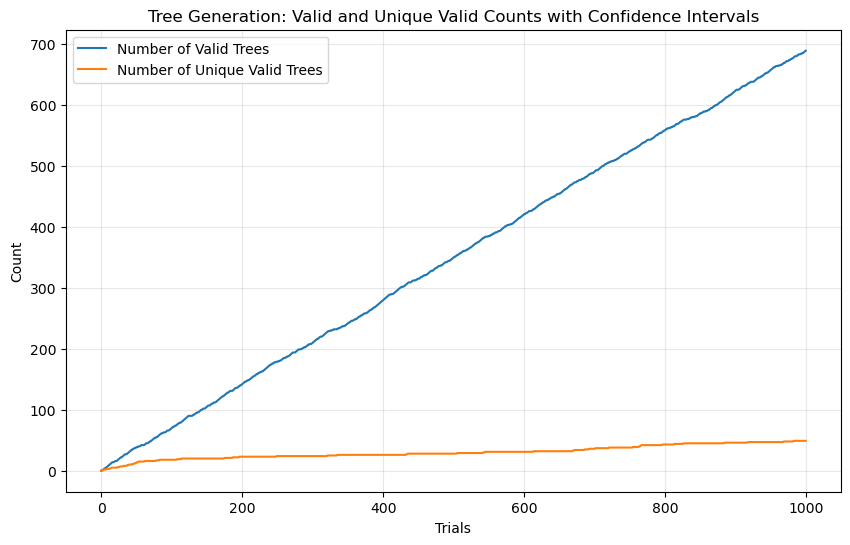

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

# Load data
with open('result.npy', 'rb') as f:
    num_valid = np.load(f)
    num_unique_valid = np.load(f)

# Define the range for the x-axis
x_range = range(len(num_valid))

# Compute moving averages and confidence intervals
window_size = 100  # Adjust for smoother or more detailed averages
num_valid_avg = uniform_filter1d(num_valid, size=window_size)
num_unique_valid_avg = uniform_filter1d(num_unique_valid, size=window_size)

# Compute standard deviation for confidence interval (using a sliding window)
def moving_std(data, window):
    return np.sqrt(uniform_filter1d(data**2, size=window) - uniform_filter1d(data, size=window)**2)

num_valid_std = moving_std(num_valid, window_size)
num_unique_valid_std = moving_std(num_unique_valid, window_size)

# Plot
plt.figure(figsize=(10, 6))

# Plot original data
plt.plot(x_range, num_valid, label='Number of Valid Trees')
plt.plot(x_range, num_unique_valid, label='Number of Unique Valid Trees')

# Customize the plot
plt.title('Tree Generation: Valid and Unique Valid Counts with Confidence Intervals')
plt.xlabel('Trials')
plt.ylabel('Count')
plt.legend()
plt.grid(alpha=0.3)

# Save the figure
# plt.savefig('figure.png', dpi=300)
plt.show()

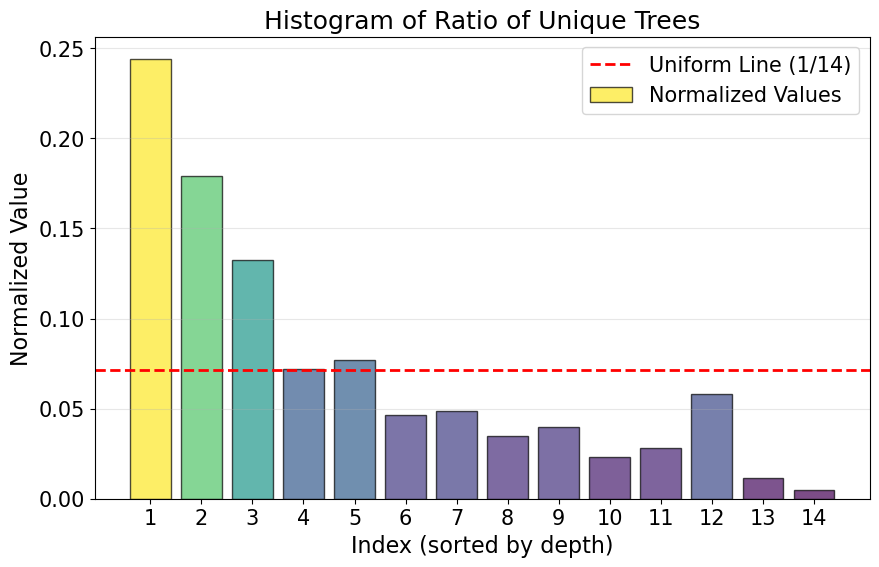

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Data
values = [105, 77, 57, 31, 33, 20, 21, 15, 17, 10, 12, 25, 5, 2]

# Normalize values
normalized_values = np.array(values) / np.sum(values)

# Histogram parameters
bins = len(normalized_values)  # Use one bin per value
x_labels = range(1, bins + 1)

# Create color gradient
norm = Normalize(vmin=min(normalized_values), vmax=max(normalized_values))
colors = plt.cm.viridis(norm(normalized_values))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(x_labels, normalized_values, color=colors, edgecolor='black', alpha=0.7, label='Normalized Values')

# Add uniform horizontal line
uniform_value = 1 / 14
plt.axhline(y=uniform_value, color='red', linestyle='--', linewidth=2, label='Uniform Line (1/14)')

# Add colorbar
sm = ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])

# Customize plot
plt.title('Histogram of Ratio of Unique Trees', fontsize=18)
plt.xlabel('Index (sorted by depth)', fontsize=16)
plt.ylabel('Normalized Value', fontsize=16)
plt.xticks(ticks=x_labels, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid(axis='y', alpha=0.3)

# Save the figure
plt.savefig('fancy_histogram.png', dpi=300)
plt.show()

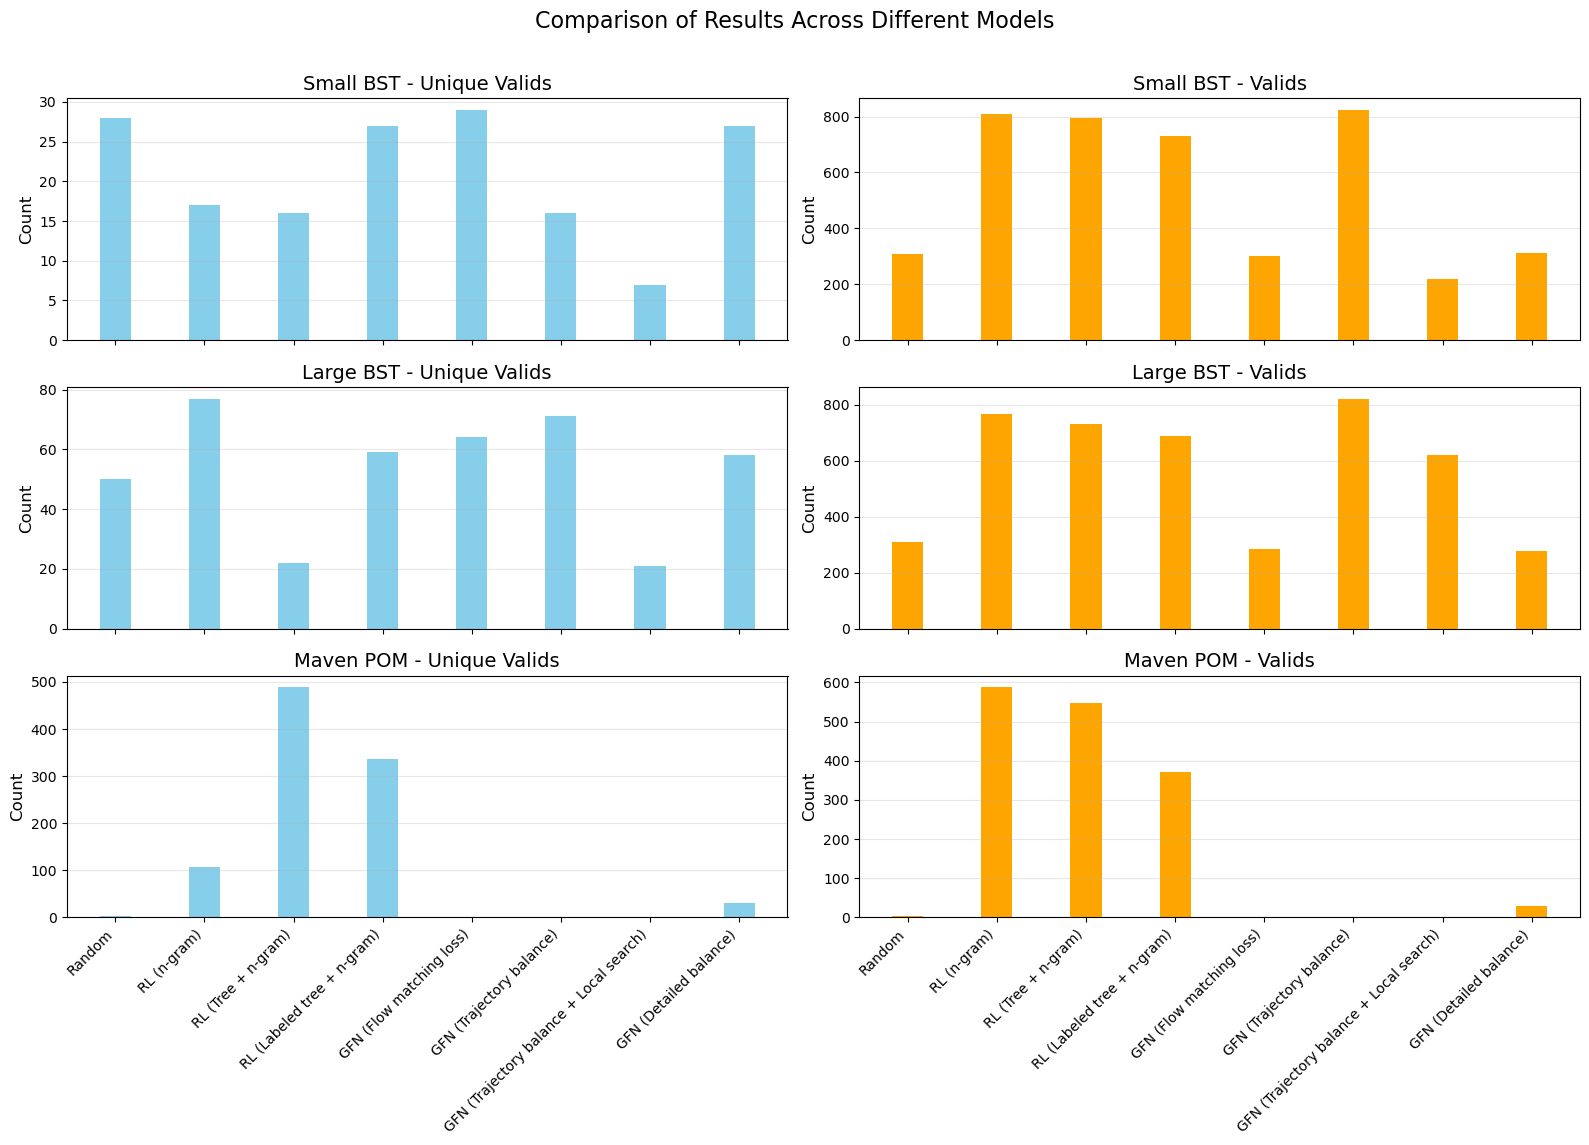

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the table
categories = ['Random', 'RL (n-gram)', 'RL (Tree + n-gram)', 'RL (Labeled tree + n-gram)',
              'GFN (Flow matching loss)', 'GFN (Trajectory balance)',
              'GFN (Trajectory balance + Local search)', 'GFN (Detailed balance)']

small_bst = {'Unique Valids': [28, 17, 16, 27, 29, 16, 7, 27], 'Valids': [308, 809, 794, 732, 300, 824, 220, 312]}
large_bst = {'Unique Valids': [50, 77, 22, 59, 64, 71, 21, 58], 'Valids': [312, 767, 732, 689, 287, 823, 621, 278]}
maven_pom = {'Unique Valids': [3, 108, 489, 337, 1, 2, 0, 30], 'Valids': [3, 588, 548, 371, 1, 2, 0, 30]}

x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

# Plotting
fig, ax = plt.subplots(3, 2, figsize=(16, 12), sharex=True)

# Small BST
ax[0, 0].bar(x, small_bst['Unique Valids'], width, label='Unique Valids', color='skyblue')
ax[0, 0].set_title('Small BST - Unique Valids', fontsize=14)
ax[0, 0].set_ylabel('Count', fontsize=12)
ax[0, 0].grid(axis='y', alpha=0.3)

ax[0, 1].bar(x, small_bst['Valids'], width, label='Valids', color='orange')
ax[0, 1].set_title('Small BST - Valids', fontsize=14)
ax[0, 1].set_ylabel('Count', fontsize=12)
ax[0, 1].grid(axis='y', alpha=0.3)

# Large BST
ax[1, 0].bar(x, large_bst['Unique Valids'], width, label='Unique Valids', color='skyblue')
ax[1, 0].set_title('Large BST - Unique Valids', fontsize=14)
ax[1, 0].set_ylabel('Count', fontsize=12)
ax[1, 0].grid(axis='y', alpha=0.3)

ax[1, 1].bar(x, large_bst['Valids'], width, label='Valids', color='orange')
ax[1, 1].set_title('Large BST - Valids', fontsize=14)
ax[1, 1].set_ylabel('Count', fontsize=12)
ax[1, 1].grid(axis='y', alpha=0.3)

# Maven POM
ax[2, 0].bar(x, maven_pom['Unique Valids'], width, label='Unique Valids', color='skyblue')
ax[2, 0].set_title('Maven POM - Unique Valids', fontsize=14)
ax[2, 0].set_ylabel('Count', fontsize=12)
ax[2, 0].set_xticks(x)
ax[2, 0].set_xticklabels(categories, rotation=45, ha='right')
ax[2, 0].grid(axis='y', alpha=0.3)

ax[2, 1].bar(x, maven_pom['Valids'], width, label='Valids', color='orange')
ax[2, 1].set_title('Maven POM - Valids', fontsize=14)
ax[2, 1].set_ylabel('Count', fontsize=12)
ax[2, 1].set_xticks(x)
ax[2, 1].set_xticklabels(categories, rotation=45, ha='right')
ax[2, 1].grid(axis='y', alpha=0.3)

# Add overall labels
fig.suptitle('Comparison of Results Across Different Models', fontsize=16)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Save the figure
plt.savefig('comparison_barplots_separated.png', dpi=300)
plt.show()
